In [14]:
#import neccessary libraries
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

#load the dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
#we are only focusing on the data analyst jobs in the united states
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

#drop NaN values from the column for plotting
#drop all the nan values from the salary_year_avg col
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

#lets look at the smaple top 10 values of it
df_DA_US['salary_year_avg'].sample(10)

403758     50000.000000
550717     80000.000000
739066     62500.000000
212551    130000.000000
775787     67000.000000
626020     60000.000000
424952     67500.000000
757708     69001.921875
587487    101500.000000
427362    128816.000000
Name: salary_year_avg, dtype: float64

<Axes: >

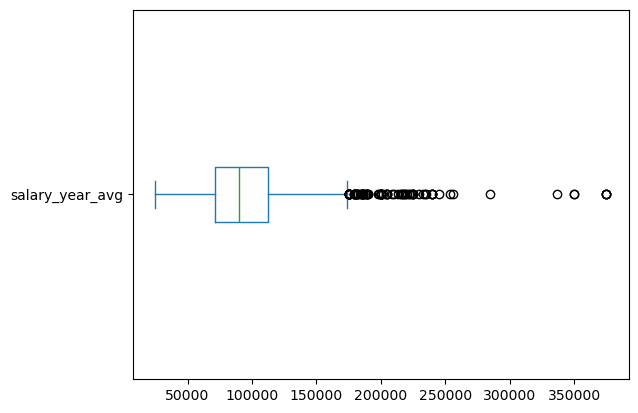

In [16]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)

C:\Users\saxen\AppData\Local\Temp\ipykernel_12836\74337190.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


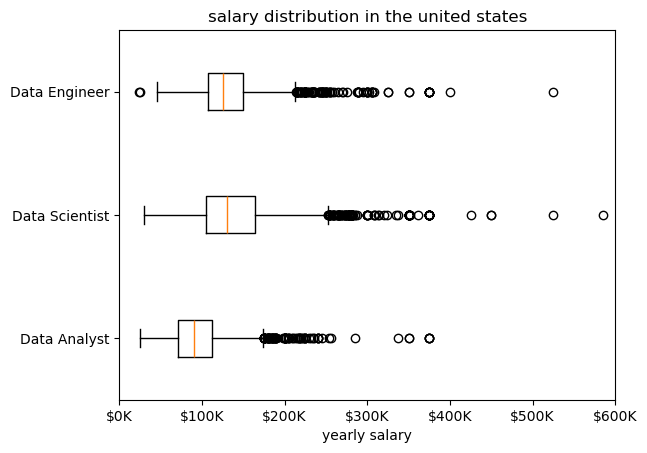

In [22]:
#what if we need to plot the salaries of data scientist data analyst and data engineer
#so define the three job titiles in a list called job_titles
#labels here (job_titles) is just the name of data analyst data scientist and data enfineer
job_titles=['Data Analyst','Data Scientist','Data Engineer']

#filter the data to appropriate job_titles
#so create  a new df which only shows jobsin job_titles and that job present in the us
df_US=df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()

#now in our df_US dataframe when we access the salary_year_avg there might be NaN values
#drop it
df_US=df_US.dropna(subset=['salary_year_avg'])

#now define job_list variable
#we loop through the job_titles list using for loop and an iterator job_title
#we access the job_title_short col from our df_US dataframe and if the col == job_title then access the salary_year_avg col and give the values (give me the salary_year_avg information)

job_list=[df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

#now plot
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('salary distribution in the united states')
plt.xlabel('yearly salary')

#we also want to modify the x axis
#get the access attribute first
ax=plt.gca()
#now modify
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
#i just want the x value to be from 0-600000
plt.xlim(0,600000)
plt.show()


In [ ]:
df_US['job_title_short'].value_counts()

job_title_short
Data Scientist    4553
Data Analyst      4350
Data Engineer     2915
Name: count, dtype: int64

In [ ]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64